In [6]:
import pandas as pd
import numpy as np
import copy
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

In [33]:
def parse_bold_data(filename):
    df = pd.DataFrame(columns=['nucleotide', 'genus name', 'class name'])
    with open(filename) as sequence_file:
        lines = sequence_file.readlines()
        for idx in range(1, len(lines)):
            data = lines[idx].split('\t')
            genus_name = data[19].strip()
            nucleotide = data[71].strip()
            class_name = data[11].strip()
            if genus_name != '':
                df.loc[len(df)] = [nucleotide, genus_name, class_name]
    df.to_csv(filename.split('.')[0]+'.csv')    

In [34]:
parse_bold_data('Pucciniomycetes.txt')

In [35]:
parse_bold_data('Polypodiopsida.txt')

In [2]:
def printAllKLength(set, k):   
    n = len(set)
    printAllKLengthRec(set, "", n, k)
    

def printAllKLengthRec(set, prefix, n, k): 
    if (k == 0) :
        res.append(prefix)
        return
  
    for i in range(n):
        newPrefix = prefix + set[i]
        printAllKLengthRec(set, newPrefix, n, k - 1)

combs = []
res = []
for i in range(7):
    printAllKLength(['A', 'C', 'G', 'T'], i+1)
    combs.append(res)
    res = copy.deepcopy([])

In [5]:
def kmerize(file, k, is_set, data, filename):
    import csv
    csv_out = open(filename + '.Cleaned.k' + str(k) + '.csv', 'w', newline='')
    writer = csv.writer(csv_out, delimiter=',')
    hasHeader = False
    a = 0
    with open(file) as f:
        for line in f:
            feature_dict = {}
            tokens = line.split(',')
            seq = tokens[1].strip()
            genus = tokens[2].strip()
            class_ = tokens[3].strip()            
            if a == 0:
                a = 1
                continue
            # skip sequences with len < 657 (see p. 7 and ref [30] in the paper)
            if len(seq) < 657:
                continue

            for i in range(len(seq)-k+1):
                kmer = seq[i:i+k]
                check = False
                for nucleotide in kmer:
                    if nucleotide not in ['A', 'C', 'G', 'T']:
                        check = True
                        break
                if check: continue
                feature_dict.setdefault(kmer, 0)
                feature_dict[kmer] += 1
            
            for key in data:
                if key not in feature_dict:
                    feature_dict[key] = 0
                    
            if not hasHeader:
                sorted_features = list(feature_dict.keys())
                sorted_features.sort()
                writer.writerow(['', 'nucleotide', 'genus name'] + sorted_features)
                hasHeader = True
                
            feature_dict = dict(sorted(feature_dict.items()))
            counter_list = list(feature_dict.values())
            writer.writerow([seq, genus] + counter_list)
    csv_out.close()

files = ['Pucciniomycetes.csv', 'Polypodiopsida.csv', 'Aves.csv', 'Chiroptera.csv', 'Rodentia.csv']

for k in range(1):
    for file in files:
        kmerize(file, k+1, False, combs[k], file.split('.')[0])

In [3]:
def get_stats(file):
    genus_freq = {}
    res = []
    genus_counter = 0
    seq_counter = 0
    with open(file, encoding='mac_roman') as sequence_file:
        for line in sequence_file:
            data = line.split('\t')
            genus_name = data[19].strip()
            nucleotide = data[71].strip()
            class_name = data[11].strip()
            if genus_name == '':
                genus_counter += 1
                continue
            elif len(nucleotide) < 657:
                seq_counter += 1
                continue
            res.append(genus_name)
            genus_freq.setdefault(genus_name, 0)
            genus_freq[genus_name] += 1
    print('class name:', class_name)
    print('total number of species:', len(genus_freq))
    print('total number of removed samples (no genus_name)', genus_counter)
    print('total number of removed_samples (sequence < 657):', seq_counter)
    print('total number of samples with sequence >= 657:', sum(genus_freq.values()))
    
    Table().with_column('species name', np.array(res)).group(0).bar('species name')

class name: Glomeromycetes
total number of species: 16
total number of removed samples (no genus_name) 336
total number of removed_samples (sequence < 657): 1306
total number of samples with sequence >= 657: 1796


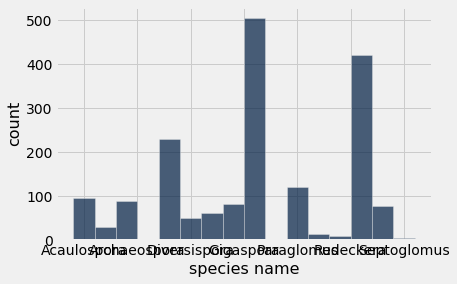

In [4]:
get_stats('Glomeromycetes.txt')

class name: Pucciniomycetes
total number of species: 34
total number of removed samples (no genus_name) 160
total number of removed_samples (sequence < 657): 1002
total number of samples with sequence >= 657: 1905


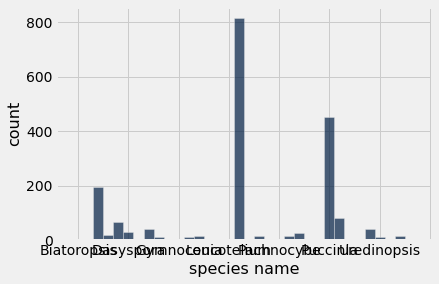

In [5]:
get_stats('Pucciniomycetes.txt')

class name: Pinopsida
total number of species: 74
total number of removed samples (no genus_name) 197
total number of removed_samples (sequence < 657): 2615
total number of samples with sequence >= 657: 4537


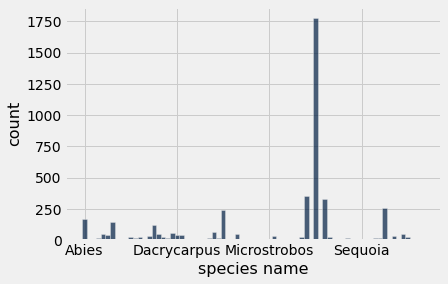

In [6]:
get_stats('Pinopsida.txt')

class name: Bryopsida
total number of species: 504
total number of removed samples (no genus_name) 829
total number of removed_samples (sequence < 657): 8924
total number of samples with sequence >= 657: 5338


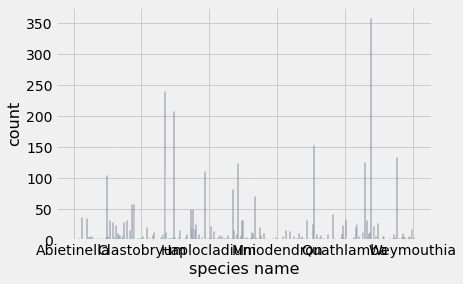

In [7]:
get_stats('Bryopsida.txt')

class name: Ulvophyceae
total number of species: 71
total number of removed samples (no genus_name) 192
total number of removed_samples (sequence < 657): 909
total number of samples with sequence >= 657: 3342


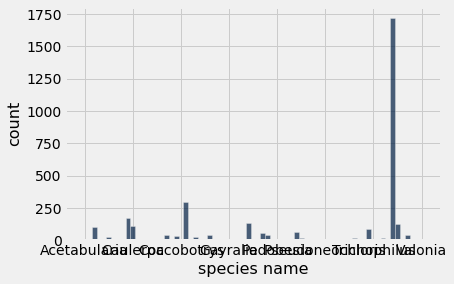

In [8]:
get_stats('Ulvophyceae.txt')

class name: Polypodiopsida
total number of species: 276
total number of removed samples (no genus_name) 310
total number of removed_samples (sequence < 657): 946
total number of samples with sequence >= 657: 5850


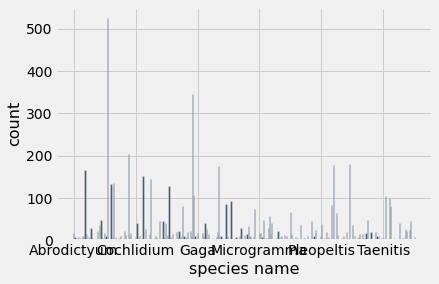

In [9]:
get_stats('Polypodiopsida.txt')